# Customer Segmentation via KMeans
From the [dataset](http://archive.ics.uci.edu/ml/datasets/Wholesale+customers) we read the amount spent by 440 customers on 6 categories of products. We seek to cluster the data into customers based on their buying history.

In [1]:
import pandas as pd
clients = pd.read_csv('dataset.txt')
clients.drop(['Channel','Region'],axis = 1,inplace = True)

In [2]:
clients.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Scale the columns with MinMaxScaler 

In [3]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
clients1 = pd.DataFrame(scale.fit_transform(clients),columns = clients.columns)
clients1.head()

C:\Users\Saif\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


# Clustering
KMeans is an iterative algorithm based on starting with a random k-clustering, finding medians for each cluster, reclustering based on these medians, and repeating the last two steps. We iterate over different k to select the one performing significantly better than its predecessor.

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wss = [0]*10
ss = [None]*10
for i in range(10):
    kmeans = KMeans(n_clusters = i+1, max_iter = 1000, random_state = 1).fit(clients1)
    wss[i] = kmeans.inertia_
    labels = kmeans.labels_
    if(i>1):
        ss[i] = silhouette_score(clients1,labels,metric = 'euclidean')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(wss)

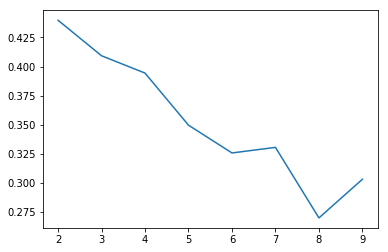

In [6]:
plt.plot(ss)

Evidently, k = 3 performs significantly better than 2; but not significantly worse than 4.
# Visualization
Utilising t-SNE to plot the 6D data with clusters formed with k = 3.

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state = 4)
embed = pd.DataFrame(tsne.fit_transform(clients1),columns = ['x','y'])
kmeans3 = KMeans(n_clusters = 3, random_state = 3).fit(clients1)
embed['labels'] = kmeans3.labels_

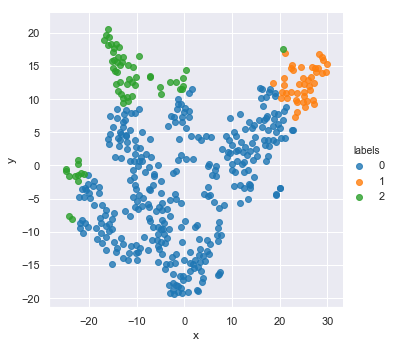

In [8]:
sns.set_context("notebook")
sns.set_style("darkgrid")
sns.lmplot(x ='x',y = 'y', hue = "labels", data = embed,fit_reg=False)
